In [2]:
import pandas as pd
import ast
import json

df = pd.read_csv("../data/processed/movie_stats/movie_stats.csv", index_col=0)
df = df.reset_index()

df["cast"] = df["cast"].map(ast.literal_eval)
df["release_date"] = pd.to_datetime(df["release_date"], format="%Y-%m-%d")
df["release_year"] = df["release_date"].dt.year
df["release_month"] = df["release_date"].dt.month
df["release_day"] = df["release_date"].dt.day



print(df)

    index                                   movie_name     imdb_id  \
0       0                                  The Marvels  tt10676048   
1       1               Guardians of the Galaxy Vol. 3   tt6791350   
2       2                      Spider-Man: No Way Home  tt10872600   
3       3                       Avengers: Infinity War   tt4154756   
4       4            Ant-Man and the Wasp: Quantumania  tt10954600   
5       5               Black Panther: Wakanda Forever   tt9114286   
6       6                       Thor: Love and Thunder  tt10648342   
7       7                                 The Avengers   tt0848228   
8       8                               Captain Marvel   tt4154664   
9       9  Doctor Strange in the Multiverse of Madness   tt9419884   
10     10                            Avengers: Endgame   tt4154796   
11     11                      Avengers: Age of Ultron   tt2395427   
12     12    Shang-Chi and the Legend of the Ten Rings   tt9376612   
13     13           

In [3]:
df.describe()

,index,movie_budget,movie_revenue,release_year,release_month,release_day
count,33.000000,3.300000e+01,3.300000e+01,33.000000,33.000000,33.000000
mean,16.181818,2.022061e+08,8.983435e+08,2016.878788,6.212121,15.787879
std,9.973260,5.826246e+07,5.661510e+08,4.435352,2.880512,9.717116
min,0.000000,1.300000e+08,1.089981e+08,2008.000000,2.000000,1.000000
25%,8.000000,1.600000e+08,5.193120e+08,2014.000000,4.000000,6.000000
50%,16.000000,2.000000e+08,7.727766e+08,2017.000000,6.000000,15.000000
75%,24.000000,2.200000e+08,1.131928e+09,2021.000000,7.000000,25.000000
max,34.000000,3.650000e+08,2.800000e+09,2023.000000,12.000000,30.000000


In [4]:
movie_counts = df["release_year"].value_counts()
df_year = df.groupby("release_year")[["movie_budget", "movie_revenue"]].sum()
df_year

,movie_budget,movie_revenue
release_year,,
2008,290000000,748886296
2010,200000000,623933331
2011,290000000,819896392
2012,220000000,1518815515
2013,370000000,1860360345
2014,340000000,1487543172
2015,495000000,1924715659
2016,430000000,1831389590
2017,555000000,2599224781


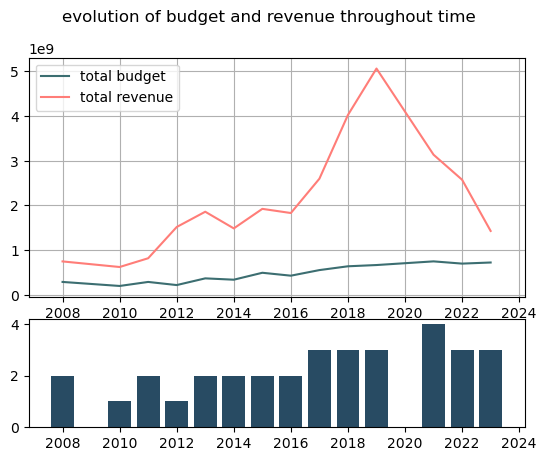

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# fig, axs = plt.subplots(1,2)
# remove the underlying axes
# for ax in axs[:2]:
#     ax.remove()
# axbig = fig.add_subplot(gs[1:, :2])


fig = plt.figure()

gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2])
ax1.grid()
ax2 = fig.add_subplot(gs[2], sharex=ax1)


ax1.plot(df_year.index, df_year["movie_budget"], color="#3C6E71", label="total budget")
# frame1.axes.get_xaxis().set_visible(False)
ax1.plot(df_year.index, df_year["movie_revenue"], color="#FF7D78", label="total revenue")
ax1.legend()
ax2.bar(movie_counts.index, movie_counts, color="#284b63")
fig.suptitle("evolution of budget and revenue throughout time")

plt.savefig("../data/raw/plots/budget_revenue_amount_of_movies.png")
plt.show()


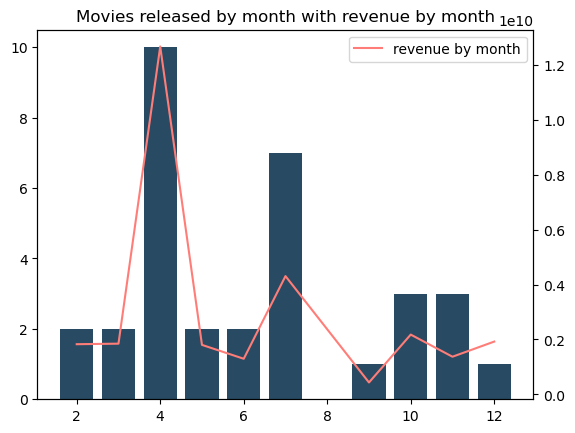

In [17]:
month_counts = df["release_month"].value_counts()
df_year = df.groupby("release_year")[["movie_budget", "movie_revenue"]].sum()
df_month = df.groupby("release_month")[["movie_budget", "movie_revenue"]].sum()

plt.bar(month_counts.index, month_counts, color="#284b63")
axes2 = plt.twinx()
axes2.plot(df_month["movie_revenue"], color="#FF7D78", label="revenue by month")

plt.title("Movies released by month with revenue by month")
plt.legend()
plt.savefig("../data/raw/plots/amount_revenue_month.png")
plt.show()

In [23]:
user_review_df = pd.read_csv("../data/raw/reviews/RT_audience.csv")
user_review_df["date"] = pd.to_datetime(user_review_df["date"], format="%Y-%m-%d")


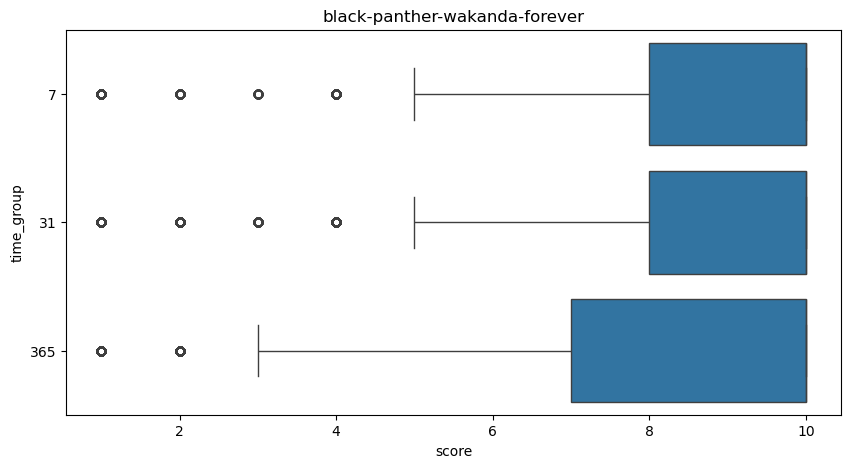

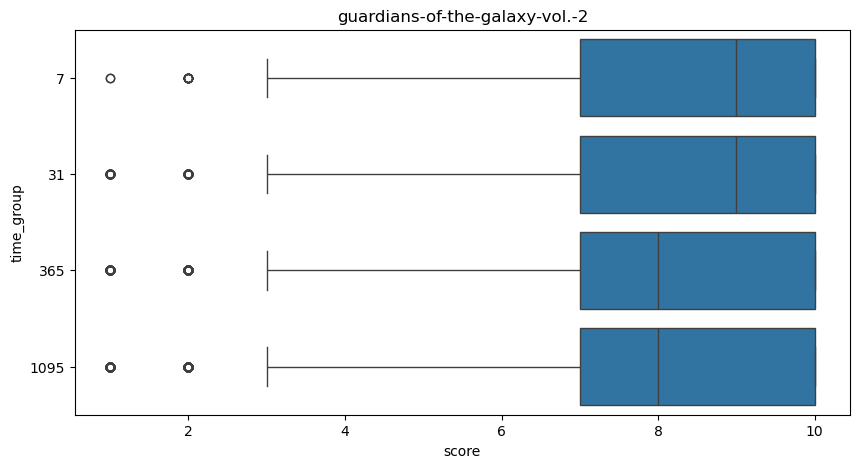

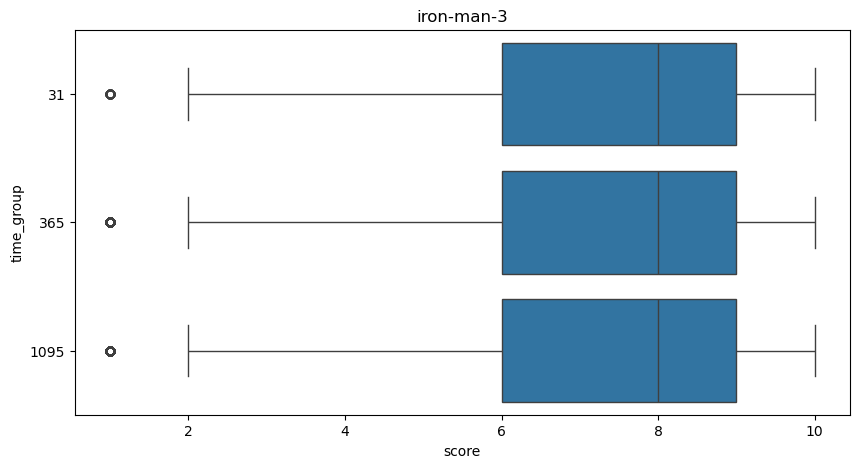

In [24]:
from datetime import datetime, timedelta
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np

movie_names = {
    5: "black-panther-wakanda-forever",
    21: "guardians-of-the-galaxy-vol.-2",
    25: "iron-man-3"
}

days = [365*3, 365, 31, 7]

for idx, name in movie_names.items():
    time_dfs = []
    movie_df = user_review_df[user_review_df["movie"] == name]
    for day in days:
        movie_df = movie_df[movie_df["date"] >= df.loc[idx]["release_date"]]
        movie_df_time = movie_df[movie_df["date"] <= df.loc[idx]["release_date"] + timedelta(days=day)].assign(time_group=day)
        if df.loc[idx]["release_date"] + timedelta(days=day) <= datetime.today():
            time_dfs.append(movie_df_time[["time_group", "score"]])
        # time_dfs.append(movie_df_time)
    if movie_df.empty:
        continue
    c_df = pd.concat(time_dfs)
# Creating plot
    fig, ax = plt.subplots(1,1, figsize=(10,5))
    sns.boxplot(y = "time_group", x="score", data=c_df, ax=ax, orient="y")
# #     # plt.plot(movie_df)
# #     # axes2 = plt.twinx()
# #     # axes2.plot(movie_df.interpolate(), color="red")
#     fig.suptitle(f"{name}")
    plt.title(f"{name}")
    plt.show()

In [25]:
critic_review_df = pd.read_csv("../data/raw/reviews/RT_critics.csv")

critic_review_df["date"] = pd.to_datetime(user_review_df["date"], format="%Y-%m-%d")

critic_review_df.head()

,movie,user,is_rotten,date,text,url,scrape date
0,ant-man-and-the-wasp-quantumania,Jeffrey Peterson,False,2023-10-21,Ant-Man and the Wasp: Quantumania is a film th...,https://www.rottentomatoes.com/m/ant_man_and_t...,2023-10-20
1,ant-man-and-the-wasp-quantumania,Lee Zumpe,False,2023-10-20,It may feel like the director ordered a truckl...,https://www.rottentomatoes.com/m/ant_man_and_t...,2023-10-20
2,ant-man-and-the-wasp-quantumania,Cris Parker,False,2023-10-20,While I still like the film overall. Every MCU...,https://www.rottentomatoes.com/m/ant_man_and_t...,2023-10-20
3,ant-man-and-the-wasp-quantumania,Sarah Vincent,True,2023-10-18,the two-dimensional supporting characters and ...,https://www.rottentomatoes.com/m/ant_man_and_t...,2023-10-20
4,ant-man-and-the-wasp-quantumania,Rick Bentley,True,2023-10-17,The errors are easy to miss because the script...,https://www.rottentomatoes.com/m/ant_man_and_t...,2023-10-20


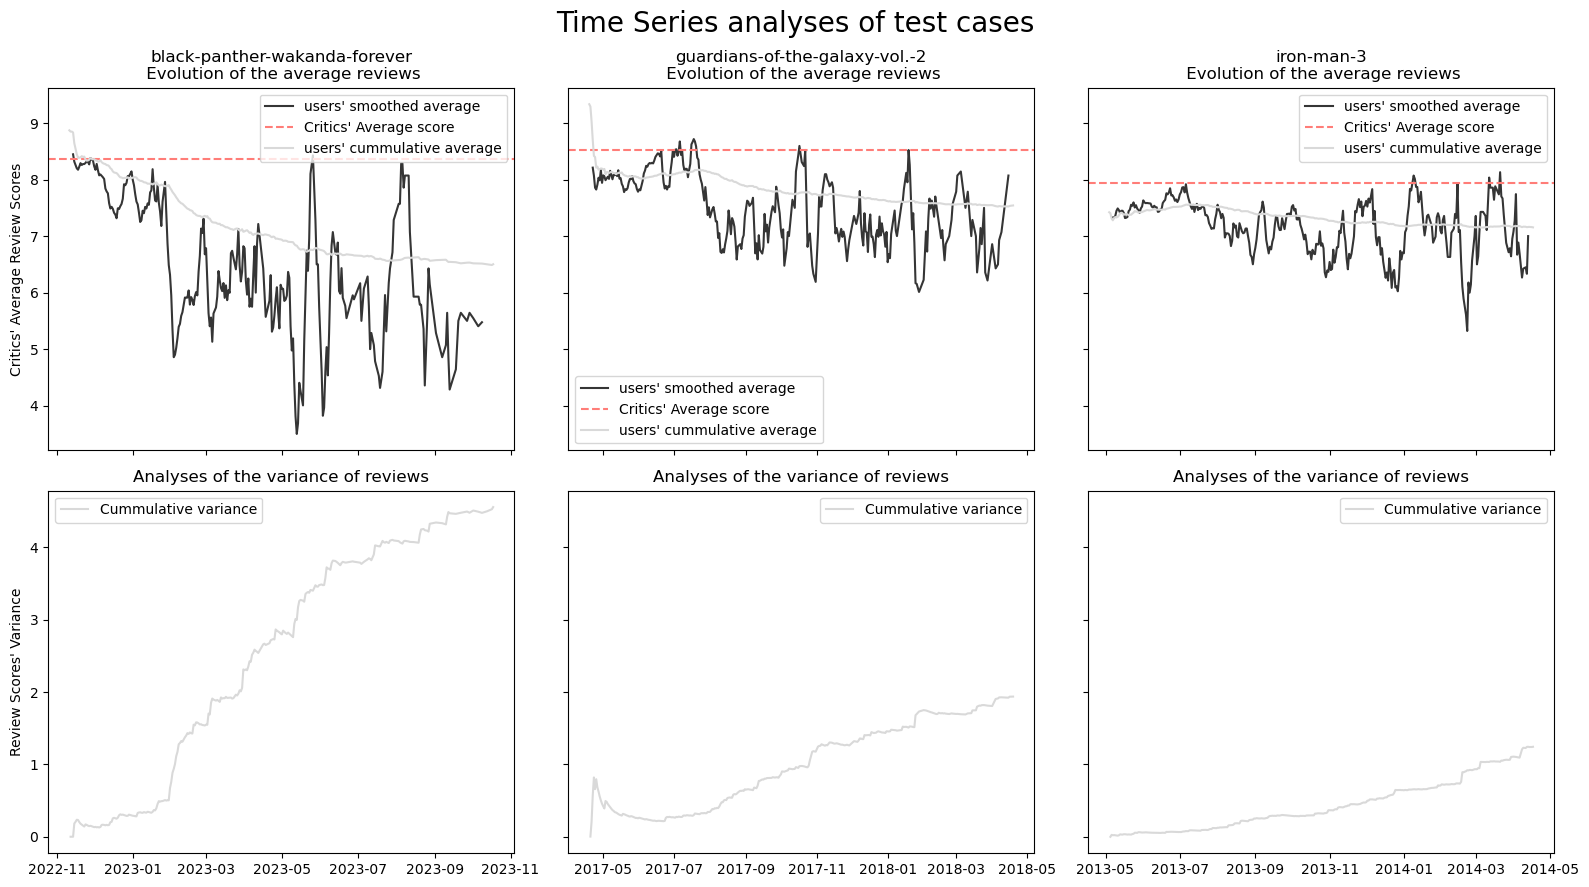

In [32]:
fig, ax = plt.subplots(2,3, figsize=(16,9), sharex='col', sharey='row')
for i, (idx, name) in enumerate(movie_names.items()):
    movie_df = user_review_df[user_review_df["movie"] == name]
    movie_df = movie_df[movie_df["date"] >= df.loc[idx]["release_date"]]
    movie_df = movie_df[movie_df["date"] <= df.loc[idx]["release_date"] + timedelta(days=365)]
    critic_df = critic_review_df[critic_review_df["movie"] == name]
    movie_df = movie_df.groupby("date")["score"].mean()
    if movie_df.empty:
        continue
    average_score =  (len(critic_df[critic_df["is_rotten"] == False])/len(critic_df)) * 10
    
    rolling_df = movie_df.rolling(7, center=True).mean()
    
    # ax[0,0].plot(movie_df, color="blue", alpha=0.1)
    ax[0,i].plot(rolling_df, color="#353535", label="users' smoothed average")
    ax[0,i].axhline(y=average_score, color='#FF7D78', linestyle='--', label="Critics' Average score")
    ax[0,i].plot(movie_df.expanding().mean(), color="#D9D9D9", label="users' cummulative average")
    ax[0,i].legend()
    ax[0,i].set_title(f"{name}\n Evolution of the average reviews")
    # sns.boxplot(x=movie_df.index.strftime('%Y'), y=movie_df, ax=ax[0,1]) 
    
    ax[1,i].plot(movie_df.expanding().var(), color="#D9D9D9", label="Cummulative variance")
    ax[1,i].legend()
    ax[1,i].set_title("Analyses of the variance of reviews")
    ax[1,0].set_ylabel("Review Scores' Variance")
    
plt.suptitle(f"Time Series analyses of test cases", fontsize=20)
ax[0,0].set_ylabel("Critics' Average Review Scores")

plt.tight_layout()
plt.savefig("../data/raw/plots/average_variance_user_reviews.png")
plt.show()

(0.26851, 0.009605, 0.335427, 1.0)


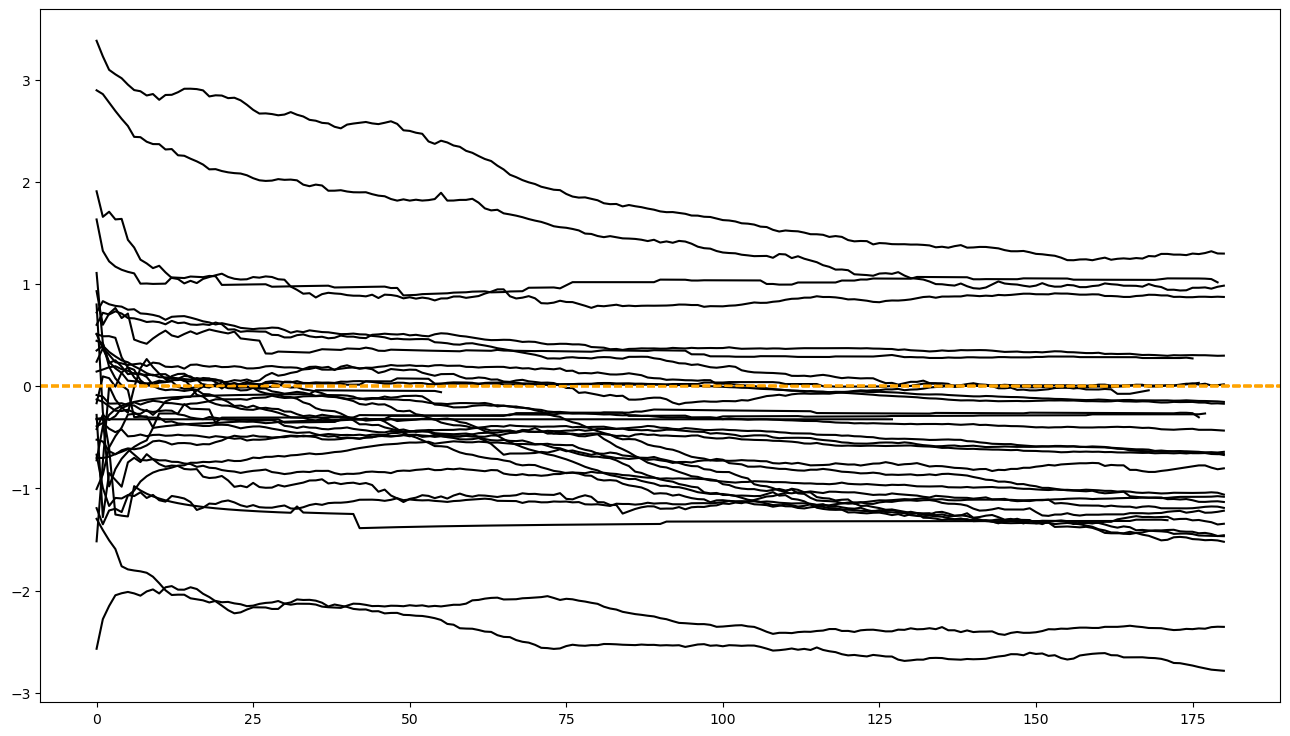

In [ ]:
from matplotlib.colors import ListedColormap, LogNorm, Normalize

fig, ax = plt.subplots(figsize=(16,9))
revenue_list = df["movie_revenue"]
cmap = plt.get_cmap("viridis")
print(cmap(1))
norm = LogNorm(revenue_list.min(), revenue_list.max())
for idx, name in enumerate(movie_names):
    movie_df = user_review_df[user_review_df["movie"] == name]
    if movie_df.empty:
        continue
    revenue = df.loc[idx]["movie_revenue"]
    critic_df = critic_review_df[critic_review_df["movie"] == name]
    movie_df = movie_df.groupby("date")["score"].mean()
    movie_df = movie_df[movie_df.index <= movie_df.index.min() + timedelta(days=180)]
    mindate = pd.Timestamp(movie_df.index.min())
    maxdate = pd.Timestamp(movie_df.index.max())
    movie_df = (movie_df.reindex(pd.date_range(mindate, maxdate, freq="D"))
                .fillna(movie_df.mean()))
    movie_df.index = (movie_df.index - mindate).days
    # movie_df = movie_df.rolling(14, center=True).mean()
    average_score =  (len(critic_df[critic_df["is_rotten"] == False])/len(critic_df)) * 10
    
    
    # color = cmap(norm(revenue_list[idx]))
    ax.plot(movie_df.expanding().mean() - average_score, color="black")
    ax.axhline(y=0, color='orange', linestyle='--')
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])  # dummy empty array for the scalar mappable
# plt.colorbar(sm, label='revenue gradient')
plt.show()
    
    